# Metadata

```
Course:   DS 5001
Module:   13 Lab
Topic:    Visualize Wine Lexicons
Author:   R.C. Alvarado
```

# Set Up

In [1]:
data_home = '../data'

In [2]:
import pandas as pd
import numpy as np
import plotly_express as px

# Get Data

In [3]:
LEX = pd.concat(
    [pd.read_csv(f'{data_home}/winereviews/winereviews-VOCAB.csv').set_index('term_str'),
     pd.read_csv(f'{data_home}/winereviews/winereviews-NB_SALEX.csv').set_index('term_str'),
     pd.read_csv(f'{data_home}/winereviews/winereviews-PERCEPTRON_SALEX.csv').set_index('term_str')],
    axis=1,
    keys=['stats','nb','pt']
).dropna()
LEX.columns = [f"{col[0]}_{col[1]}" for col in LEX.columns]

In [4]:
LEX

,stats_n,nb_polarity,nb_valence,pt_weight
term_str,,,,
000,33.0,-1.0,-0.000082,-6.0
04,19.0,1.0,0.000011,-11.0
05,20.0,1.0,0.000040,1.0
06,18.0,1.0,0.000021,-1.0
07,15.0,1.0,0.000025,4.0
...,...,...,...,...
zinfandel,123.0,-1.0,-0.000537,-1.0
zing,14.0,-1.0,-0.000008,0.0
zingy,26.0,-1.0,-0.000025,-3.0


# Visualize

In [35]:
def bubble(x, y):
    global LEX
    fig = px.scatter(LEX, x=x, y=y, 
                     height=800, width=1000, text=LEX.index, size='stats_n',
                     hover_name=LEX.index, hover_data=['stats_n'],
                    ).update_traces(textposition='top center').show()

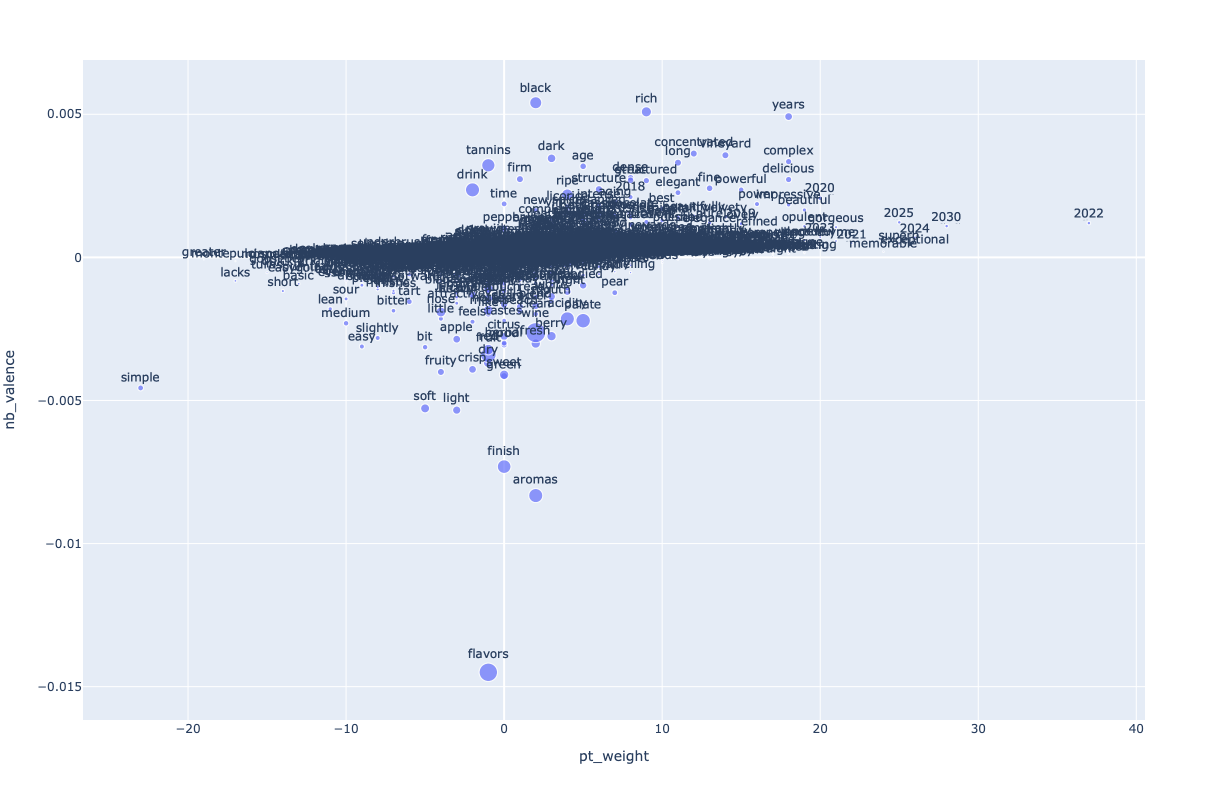

In [36]:
bubble('pt_weight', 'nb_valence')

**Noted Oppositions**
* simple / complex
* little / big
* light / dark

In [18]:
def text(x):
    global LEX
    fig = px.scatter(LEX, x=x, y='stats_n', text=LEX.index, height=800, width=1000)
    fig.update_traces(mode="text")
    fig.show()

## Naive Bayes

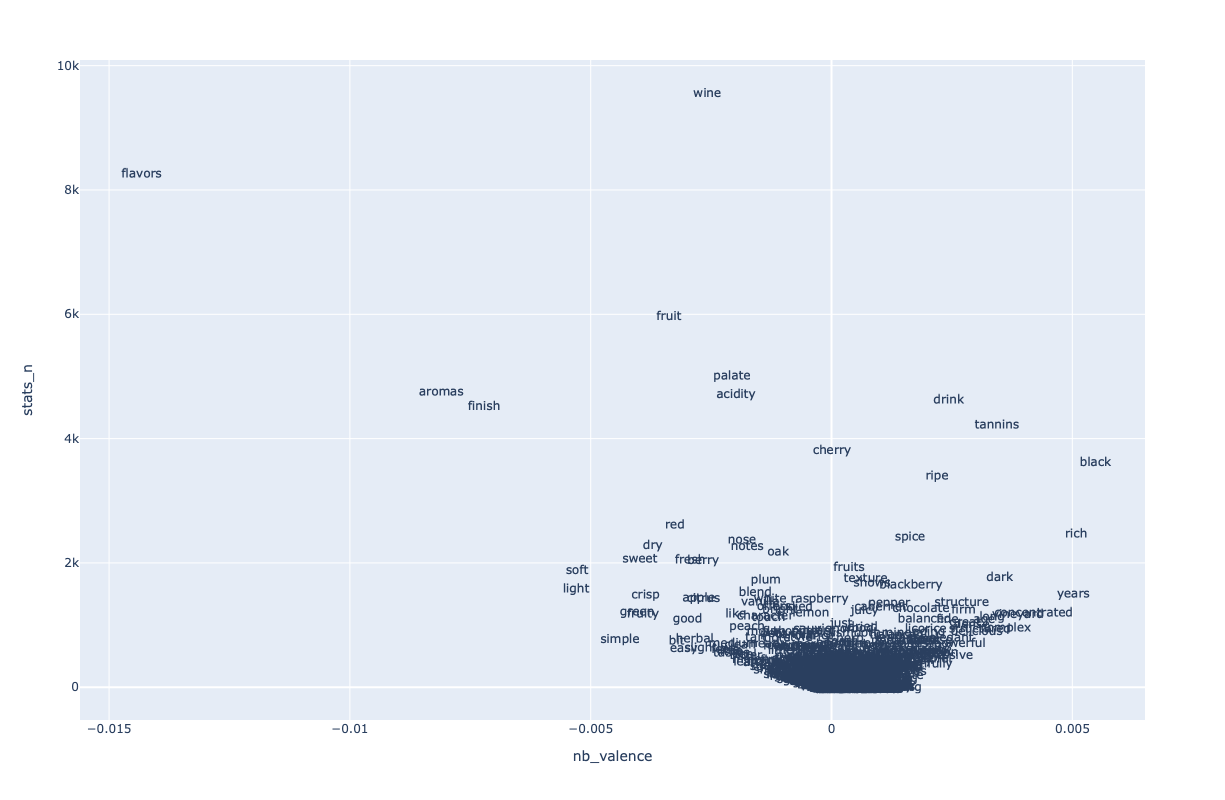

In [19]:
text('nb_valence')

## Perceptron

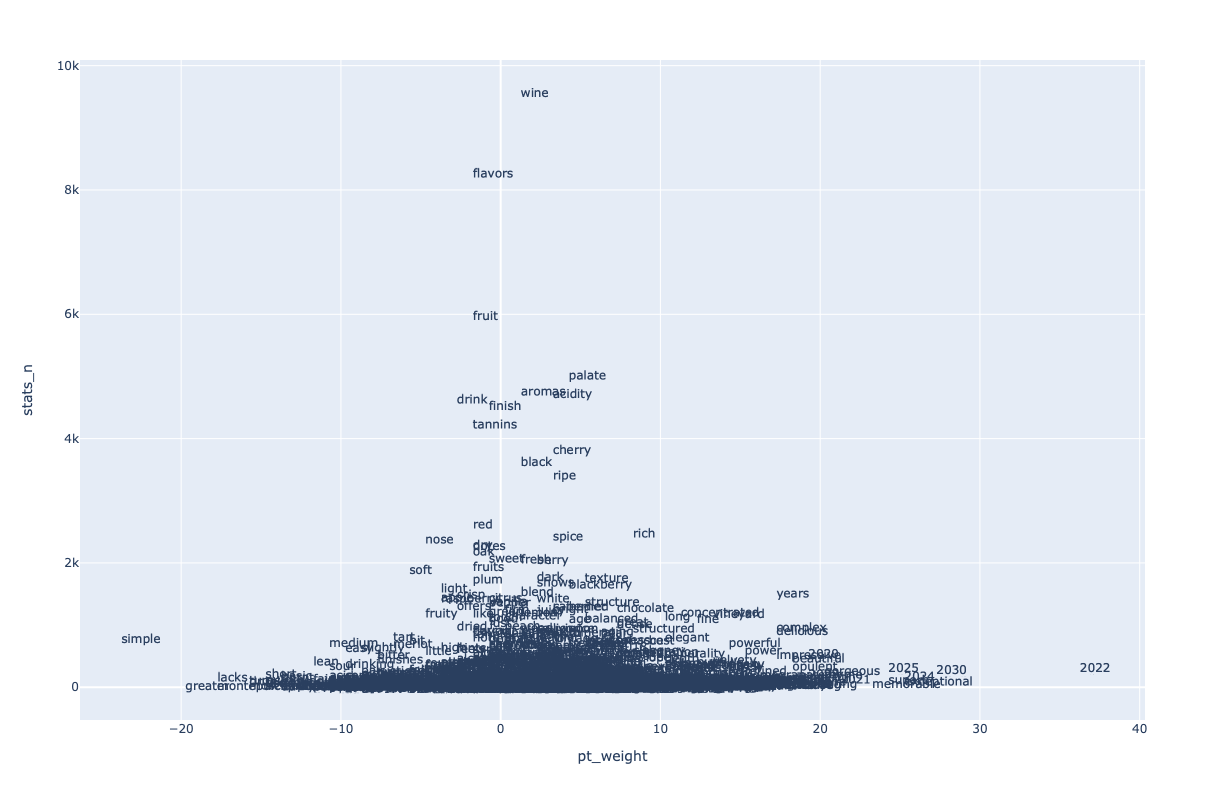

In [37]:
text('pt_weight')

# Which is best?